 <h1 style=\"font-size:3rem;color:black;\">Music Recomendation Model<h1>

# Importing Libraries 

In [66]:
#!pip install opendatasets

In [2]:
import missingno as msno
import os
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
print("Imported all modules")

Imported all modules


# Loading the data into pandas dataframe

In [3]:
dataset = 'https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/data'
od.download(dataset) 

Skipping, found downloaded files in ".\kkbox-music-recommendation-challenge" (use force=True to force download)


In [4]:
data_dir = ".\kkbox-music-recommendation-challenge"

In [5]:
os.listdir(data_dir)

['members.csv.7z',
 'sample_submission.csv.7z',
 'songs.csv.7z',
 'song_extra_info.csv.7z',
 'test.csv.7z',
 'train.csv.7z']

In [6]:
members_df = pd.read_csv("members.csv")
members_df

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [7]:
songs_df = pd.read_csv("songs.csv")
songs_df

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


In [8]:
songs_extra_info_df = pd.read_csv("song_extra_info.csv")
songs_extra_info_df

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


In [9]:
training_df = pd.read_csv("train.csv")
training_df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


## Joining data using pandas 

In [13]:
merge_1 = pd.merge(training_df, songs_df, on = 'song_id', how = 'left')
merge_2 = pd.merge(merge_1, songs_extra_info_df, on = 'song_id', how = 'left')
songs = pd.merge(merge_2, members_df, on = 'msno', how = 'left')
del training_df, songs_df, songs_extra_info_df, members_df, merge_1, merge_2
songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [14]:
songs.shape

(7377418, 20)

In [15]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  name                    object 
 13  isrc                    object 
 14  city                    int64  
 15  bd                      int64  
 16  gender                  object 
 17  registered_via          int64  
 18  registration_init_time  int64  
 19  expiration_date         int64  
dtypes: float64(2), int64(6), object(12)
memory usage: 1.2+ GB


## Dealing with the missing values

In [16]:
songs.isna().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
song_length                   114
genre_ids                  118455
artist_name                   114
composer                  1675706
lyricist                  3178798
language                      150
name                         1457
isrc                       577858
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

## Visualizing the missing values usning missingno module

<AxesSubplot:>

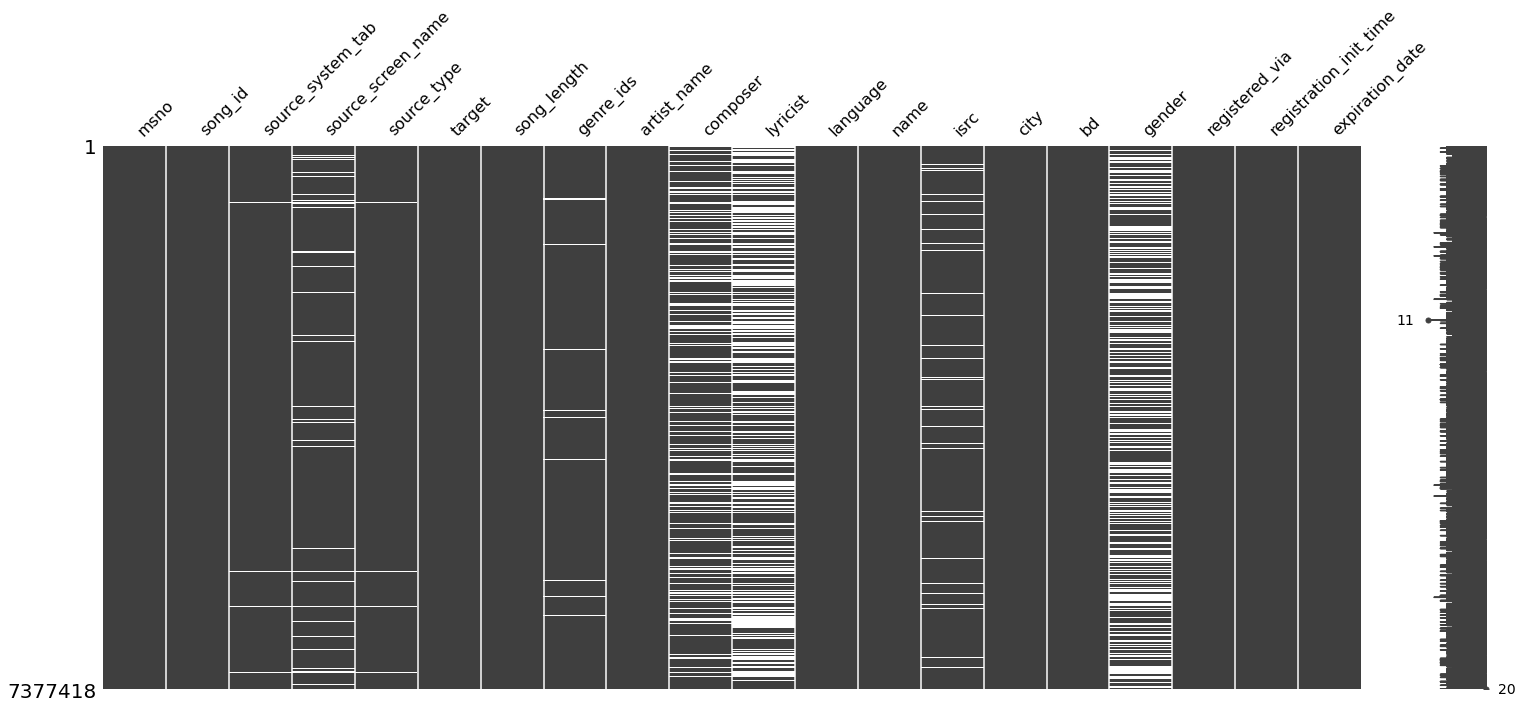

In [17]:
msno.matrix(songs)

<AxesSubplot:>

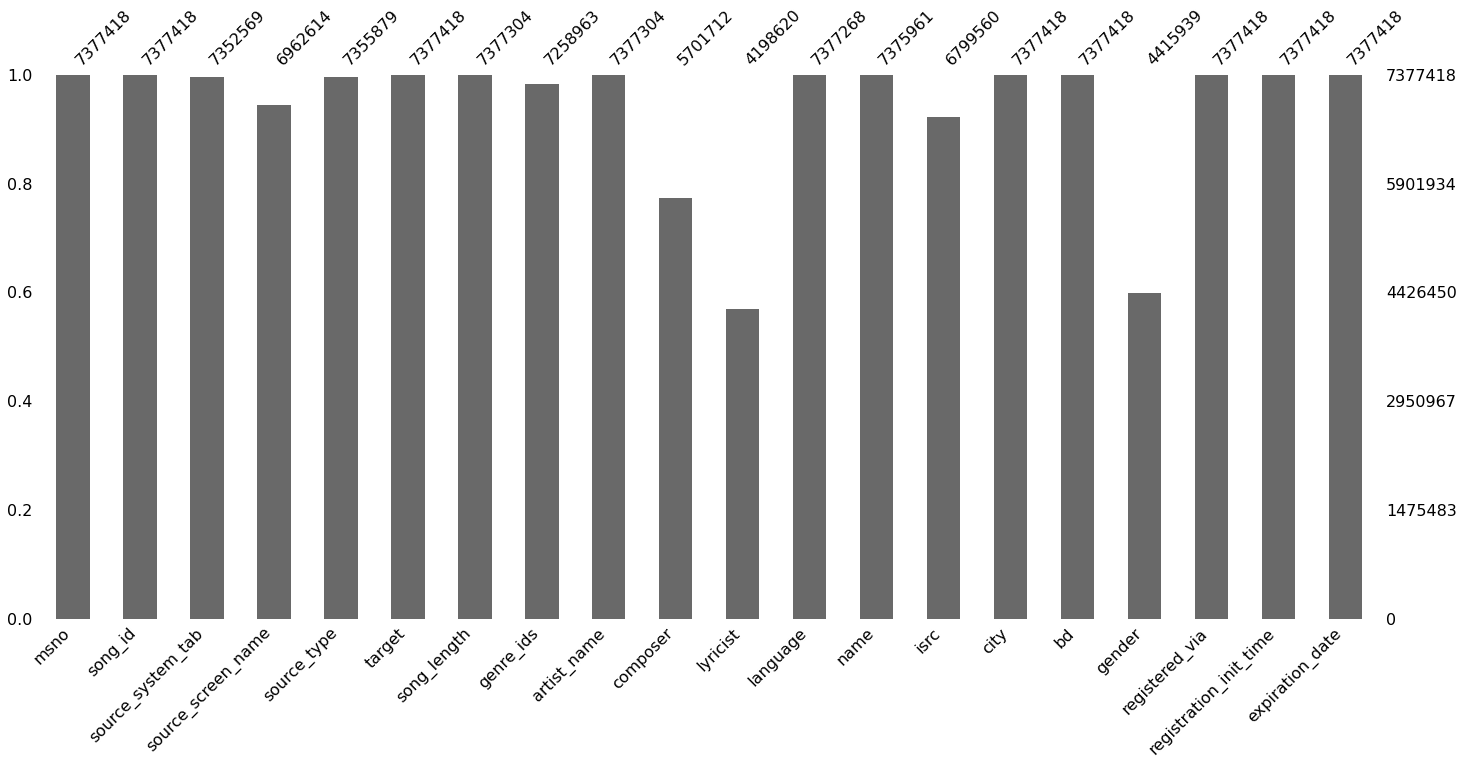

In [19]:
msno.bar(songs)

In [20]:
# replacing the empty string values with "unknown"
for col in songs.select_dtypes(include=['object']).columns:
    songs[col][songs[col].isnull()] = 'unknown'
for col in songs.select_dtypes(include=['object']).columns:
    print(songs[col].isna().sum)
print("All empty strings got replaced with unknown ")

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
7377413    False
7377414    False
7377415    False
7377416    False
7377417    False
Name: msno, Length: 7377418, dtype: bool>
<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
7377413    False
7377414    False
7377415    False
7377416    False
7377417    False
Name: song_id, Length: 7377418, dtype: bool>
<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
7377413    False
7377414    False
7377415    False
7377416    False
7377417    False
Name: source_system_tab, Length: 7377418, dtype: bool>
<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          Fals

In [21]:
# replacing all empty numerics with zeros
songs.fillna(value = 0).tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,267958.0,1259,Dr. Dre,Andre R. Young| Melvin Charles Bradford| Shawn...,unknown,52.0,Still D.R.E.,USIR19905031,4,26,female,9,20041218,20170930
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,227404.0,465,R. City feat. Adam Levine,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,52.0,Locked Away,USRC11501369,1,0,unknown,7,20130627,20171006
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,258298.0,465,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),姚中仁 MC HotDog 陳昱榕 Ｅ-SO 周文傑 KENZY 林睦淵,姚中仁 MC HotDog 陳昱榕 Ｅ-SO 周文傑 KENZY 林睦淵,3.0,FLY OUT,TWA451512031,1,0,unknown,7,20130627,20171006
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,524146.0,2122,Brad Mehldau Trio,unknown,unknown,52.0,Wonderwall,USNO10750721,5,0,unknown,9,20150213,20170918
7377417,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,Ju0VGkjWeBUZCd7r5Az2hUImhMoWxWLUicOedsmvG0g=,discover,Discover Genre,online-playlist,1,254026.0,212,Biréli Lagrène| Sylvain Luc,Robert Andrew Hyman| Cyndy Lauper,Robert Andrew Hyman| Cyndy Lauper,52.0,Time after time,FR14F9900090,5,0,unknown,9,20150213,20170918


<AxesSubplot:>

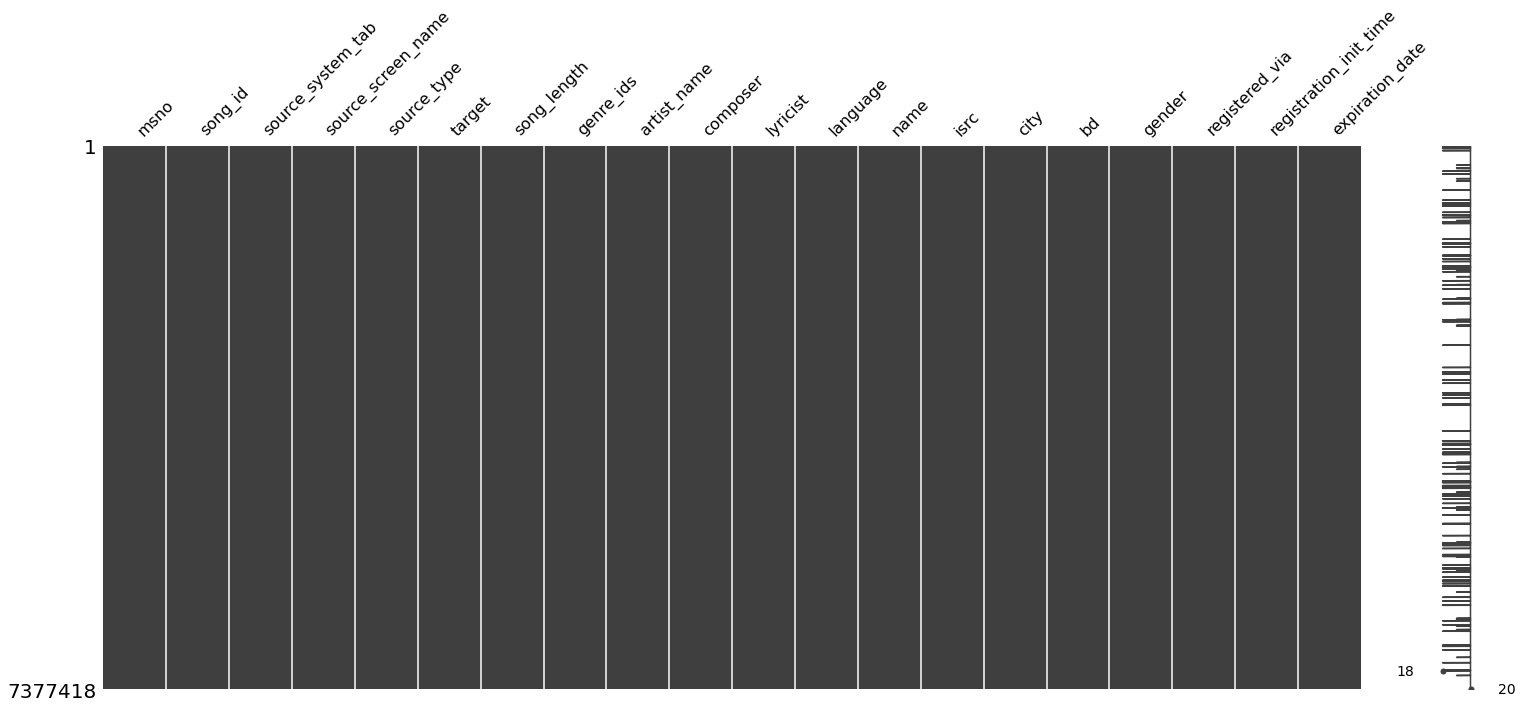

In [22]:
# check that all missing values are replaced
msno.matrix(songs)

<AxesSubplot:>

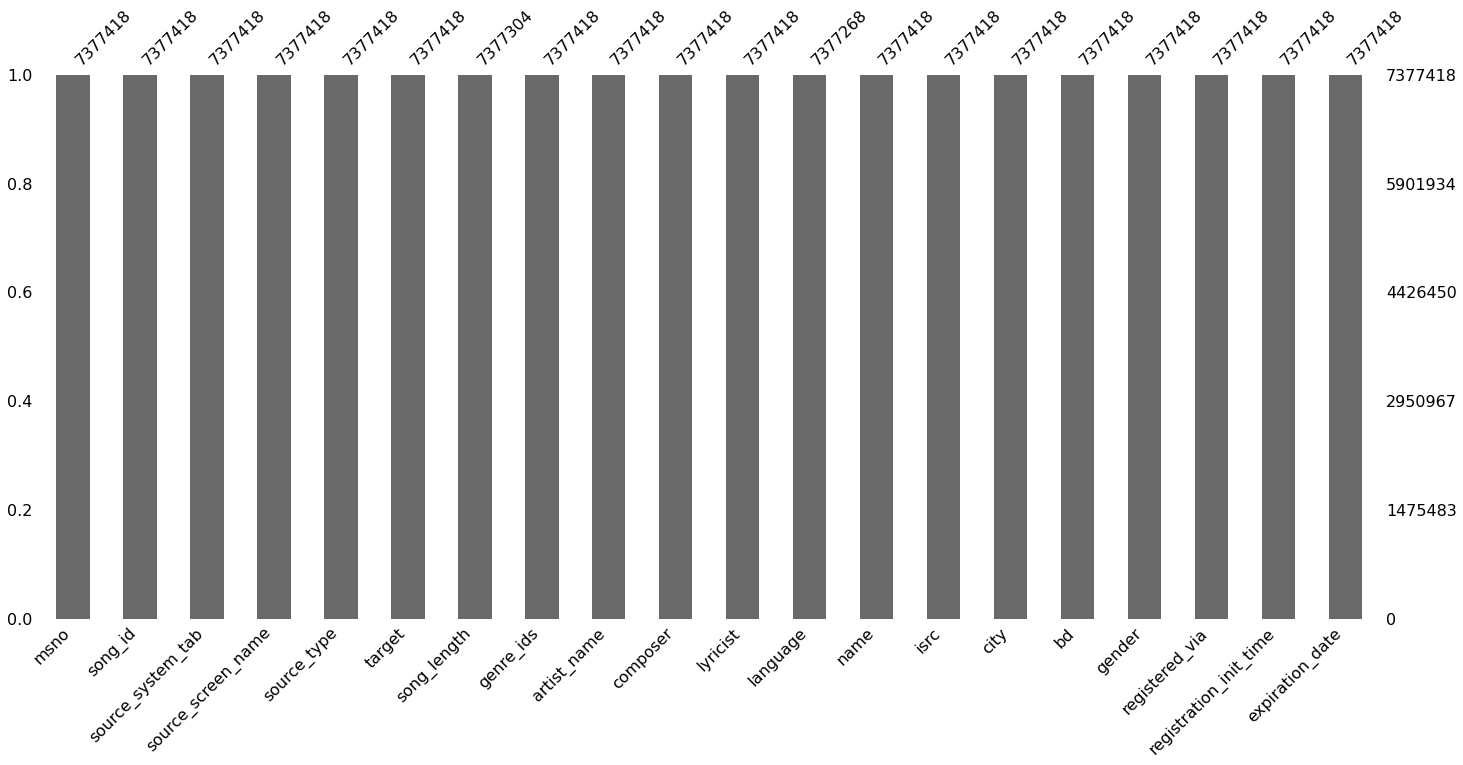

In [23]:
msno.bar(songs)

## converting the data in some columns to more reliable form 

In [24]:
#registration_init_time
songs.registration_init_time = pd.to_datetime(songs.registration_init_time, format='%Y%m%d', errors='ignore')
songs['registration_init_time_year'] = songs['registration_init_time'].dt.year
songs['registration_init_time_month'] = songs['registration_init_time'].dt.month
songs['registration_init_time_day'] = songs['registration_init_time'].dt.day
songs["registration_init_time"].head(5)

0   2012-01-02
1   2011-05-25
2   2011-05-25
3   2011-05-25
4   2012-01-02
Name: registration_init_time, dtype: datetime64[ns]

In [25]:
#expiration_date
songs.expiration_date = pd.to_datetime(songs.expiration_date,  format='%Y%m%d', errors='ignore')
songs['expiration_date_year'] = songs['expiration_date'].dt.year
songs['expiration_date_month'] = songs['expiration_date'].dt.month
songs['expiration_date_day'] = songs['expiration_date'].dt.day
songs["expiration_date"].head(5)

0   2017-10-05
1   2017-09-11
2   2017-09-11
3   2017-09-11
4   2017-10-05
Name: expiration_date, dtype: datetime64[ns]

In [26]:
songs.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,unknown,52.0,Good Grief,GBUM71602854,1,0,unknown,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,unknown,unknown,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,unknown,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,unknown,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,unknown,52.0,Sleep Without You,QM3E21606003,1,0,unknown,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5


# Pre-Processing the data using scikit-learn preprocessing

In [28]:
# importing module 
from sklearn.preprocessing import LabelEncoder

#instanciating the class
lbl_encoder = LabelEncoder()

for col in songs.columns:
    songs[col] = lbl_encoder.fit_transform(songs[col])
songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,8158,74679,1,7,6,1,19020,285,3277,14581,22976,8,51445,65244,0,2,2,2,2131,989,8,0,1,14,9,4
1,17259,223479,3,8,4,1,36984,90,31960,64996,22976,8,81301,195670,11,21,0,3,1909,965,7,4,24,14,8,10
2,17259,120758,3,8,4,1,23675,90,21372,45057,22976,8,57307,253629,11,21,0,3,1909,965,7,4,24,14,8,10
3,17259,23707,3,8,4,1,30969,6,27439,36700,22976,0,34728,65572,11,21,0,3,1909,965,7,4,24,14,8,10
4,8158,33308,1,7,6,1,14877,2,4472,8485,22976,8,121801,131942,0,2,2,2,2131,989,8,0,1,14,9,4


# Splitting the data into features and a target variables

In [29]:
# features variable 
X = songs.drop(["target"], axis=1) 
X.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,8158,74679,1,7,6,19020,285,3277,14581,22976,8,51445,65244,0,2,2,2,2131,989,8,0,1,14,9,4
1,17259,223479,3,8,4,36984,90,31960,64996,22976,8,81301,195670,11,21,0,3,1909,965,7,4,24,14,8,10


In [30]:
X.shape

(7377418, 25)

In [31]:
y = songs["target"]
y.head(2)

0    1
1    1
Name: target, dtype: int64

In [32]:
y.shape

(7377418,)

In [33]:
songs.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
count,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06
mean,1.542191e+04,1.794591e+05,2.441074e+00,9.084108e+00,4.765057e+00,5.035171e-01,2.767355e+04,3.295562e+02,2.772116e+04,5.404128e+04,2.279010e+04,3.212106e+00,1.481937e+05,1.657885e+05,5.866712e+00,1.631727e+01,1.114290e+00,1.945496e+00,2.548288e+03,9.761558e+02,8.740506e+00,5.832306e+00,1.481532e+01,1.407162e+01,7.341742e+00,1.462338e+01
std,8.894859e+03,1.038079e+05,1.890672e+00,4.593713e+00,2.468540e+00,4.999877e-01,9.432223e+03,9.780670e+01,1.264773e+04,2.109593e+04,6.982094e+03,3.043155e+00,6.655105e+04,6.481719e+04,6.301831e+00,1.354566e+01,8.218868e-01,1.079774e+00,9.648234e+02,1.122230e+02,3.018861e+00,3.700723e+00,8.768549e+00,3.972221e-01,2.511360e+00,9.107235e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.713000e+03,8.919500e+04,0.000000e+00,8.000000e+00,3.000000e+00,0.000000e+00,2.103200e+04,3.370000e+02,1.785800e+04,3.888900e+04,2.297600e+04,1.000000e+00,9.530900e+04,1.369180e+05,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.950000e+03,9.650000e+02,7.000000e+00,2.000000e+00,7.000000e+00,1.400000e+01,8.000000e+00,7.000000e+00
50%,1.551300e+04,1.788250e+05,3.000000e+00,8.000000e+00,4.000000e+00,1.000000e+00,2.775600e+04,3.440000e+02,3.470000e+04,6.499600e+04,2.297600e+04,1.000000e+00,1.741030e+05,1.685090e+05,3.000000e+00,1.800000e+01,1.000000e+00,2.000000e+00,2.679000e+03,9.800000e+02,9.000000e+00,6.000000e+00,1.500000e+01,1.400000e+01,8.000000e+00,1.400000e+01
75%,2.317300e+04,2.680050e+05,3.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,3.461700e+04,3.440000e+02,3.739000e+04,6.849500e+04,2.678900e+04,8.000000e+00,1.995470e+05,1.924860e+05,1.100000e+01,2.600000e+01,2.000000e+00,3.000000e+00,3.407000e+03,9.900000e+02,1.100000e+01,9.000000e+00,2.200000e+01,1.400000e+01,9.000000e+00,2.200000e+01
max,3.075400e+04,3.599650e+05,8.000000e+00,2.000000e+01,1.200000e+01,1.000000e+00,6.026600e+04,5.720000e+02,4.058200e+04,7.606300e+04,3.388700e+04,1.000000e+01,2.341430e+05,2.697600e+05,2.000000e+01,9.100000e+01,2.000000e+00,4.000000e+00,3.810000e+03,1.394000e+03,1.300000e+01,1.100000e+01,3.000000e+01,1.700000e+01,1.100000e+01,3.000000e+01


# Splitting the data into training and testing data using scikit learn

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print("Done....")

Done....


In [32]:
songs.duplicated().sum()

0

# Fitting a Random Forest Classifier Model 

In [35]:
x,y = X_train.shape
print("X_train has rows :", x)
x%8
8*645524

X_train has rows : 5164192


5164192

In [36]:
X_train_array=[ ]
y_train_array=[]
size = 645524
start = 0
end = 645524
for i in range(8):
    X_train_array.append(X_train[start:end-1])
    y_train_array.append(y_train[start:end-1])
    end += size-1
    start+= size
del X_train, y_train

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10000)
for i in range(8):
    rf_clf.fit(X_train_array[i], y_train_array[i])
    print("done with the ", i , " fit ")

    
print("done for all ")

done with the  0  fit 
done with the  1  fit 
done with the  2  fit 
done with the  3  fit 
done with the  4  fit 
done with the  5  fit 
done with the  6  fit 
done with the  7  fit 
done for all 


In [51]:
y_pred = rf_clf.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix 
print("Confusion matrix : ", confusion_matrix(y_test, y_pred))
print("___________________________________________________")

Confusion matrix :  [[724415 373487]
 [337788 777536]]
___________________________________________________


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
print("roc_score = ",roc_auc_score(y_test, y_pred) )


NameError: name 'y_test' is not defined